# 0. Install and Import Dependencies

In [1]:
# !pip install mediapipe opencv-python pandas

In [2]:
import mediapipe as mp
import cv2
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')

In [3]:
mp_drawing = mp.solutions.drawing_utils #Drawing helpers
mp_pose = mp.solutions.pose # initiate model pose

# 1. Extract Video to Dataset

In [4]:
# # for initiate header
# landmarks = ["class"]
# for val in range(1, 33+1):
#     landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [5]:
# # writing header for dataset file
# with open('grip_v3.csv', mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(landmarks)

In [7]:
# # function to write to csv file
# def export_landmark(results, action):
#     try:
#         keypoints = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
#         keypoints.insert(0, action)
#         with open('grip_4v.csv', mode='a', newline='') as f:
#             csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#             csv_writer.writerow(keypoints)
#     except Exception as e:
#         pass

In [180]:
def plot_world_landmarks(
    plt,
    ax,
    landmarks,
    visibility_th=0.5,
):
    landmark_point = []

    # for index, landmark in enumerate(landmarks.landmark):
    #     landmark_point.append(
    #         [landmark.visibility, (landmark.x, landmark.y, landmark.z)])
    for index, landmark in enumerate(landmarks):
        landmark_point.append(
            [landmark[3], (landmark[0], landmark[1], landmark[2])])
        
    face_index_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    right_arm_index_list = [11, 13, 15, 17, 19, 21]
    left_arm_index_list = [12, 14, 16, 18, 20, 22]
    right_body_side_index_list = [11, 23, 25, 27, 29, 31]
    left_body_side_index_list = [12, 24, 26, 28, 30, 32]
    shoulder_index_list = [11, 12]
    waist_index_list = [23, 24]

    # 顔
    face_x, face_y, face_z = [], [], []
    for index in face_index_list:
        point = landmark_point[index][1]
        face_x.append(point[0])
        face_y.append(point[2])
        face_z.append(point[1] * (-1))

    # 右腕
    right_arm_x, right_arm_y, right_arm_z = [], [], []
    for index in right_arm_index_list:
        point = landmark_point[index][1]
        right_arm_x.append(point[0])
        right_arm_y.append(point[2])
        right_arm_z.append(point[1] * (-1))

    # 左腕
    left_arm_x, left_arm_y, left_arm_z = [], [], []
    for index in left_arm_index_list:
        point = landmark_point[index][1]
        left_arm_x.append(point[0])
        left_arm_y.append(point[2])
        left_arm_z.append(point[1] * (-1))

    # 右半身
    right_body_side_x, right_body_side_y, right_body_side_z = [], [], []
    for index in right_body_side_index_list:
        point = landmark_point[index][1]
        right_body_side_x.append(point[0])
        right_body_side_y.append(point[2])
        right_body_side_z.append(point[1] * (-1))

    # 左半身
    left_body_side_x, left_body_side_y, left_body_side_z = [], [], []
    for index in left_body_side_index_list:
        point = landmark_point[index][1]
        left_body_side_x.append(point[0])
        left_body_side_y.append(point[2])
        left_body_side_z.append(point[1] * (-1))

    # 肩
    shoulder_x, shoulder_y, shoulder_z = [], [], []
    for index in shoulder_index_list:
        point = landmark_point[index][1]
        shoulder_x.append(point[0])
        shoulder_y.append(point[2])
        shoulder_z.append(point[1] * (-1))

    # 腰
    waist_x, waist_y, waist_z = [], [], []
    for index in waist_index_list:
        point = landmark_point[index][1]
        waist_x.append(point[0])
        waist_y.append(point[2])
        waist_z.append(point[1] * (-1))
            
    ax.cla()
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)

    ax.scatter(face_x, face_y, face_z)
    ax.plot(right_arm_x, right_arm_y, right_arm_z)
    ax.plot(left_arm_x, left_arm_y, left_arm_z)
    ax.plot(right_body_side_x, right_body_side_y, right_body_side_z)
    ax.plot(left_body_side_x, left_body_side_y, left_body_side_z)
    ax.plot(shoulder_x, shoulder_y, shoulder_z)
    ax.plot(waist_x, waist_y, waist_z)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    plt.pause(.001)

    return

In [183]:
def rotate_x_axis(coords, theta):
    coord, v = np.array([coords.x, coords.y, coords.z]), coords.visibility

    rotation_marix = np.array([[1,                         0,                         0],
                               [0, np.cos(np.deg2rad(theta)),-np.sin(np.deg2rad(theta))],
                               [0, np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta))]])

    new_coord = np.dot(rotation_marix, coord)

    return [new_coord[0], new_coord[1], new_coord[2], v]
    

In [184]:
def rotate_y_axis(coords, theta):
    coord, v = np.array([coords.x, coords.y, coords.z]), coords.visibility

    rotation_marix = np.array([[ np.cos(np.deg2rad(theta)), 0, np.sin(np.deg2rad(theta))],
                               [                         0, 1, 0                        ],
                               [-np.sin(np.deg2rad(theta)), 0, np.cos(np.deg2rad(theta))]])

    new_coord = np.dot(rotation_marix, coord)

    return [new_coord[0], new_coord[1], new_coord[2], v]
    

In [ ]:
def rotate_z_axis(coords, theta):
    coord, v = np.array([coords.x, coords.y, coords.z]), coords.visibility

    rotation_marix = np.array([[np.cos(np.deg2rad(theta)), -np.sin(np.deg2rad(theta)),0],
                               [np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta)) ,0],
                               [0                     , 0                      ,1]])

    new_coord = np.dot(rotation_marix, coord)

    return [new_coord[0], new_coord[1], new_coord[2], v]

In [188]:
def rotate_landmark(landmarks, range_angle=30) :
    landmark_point = []
    num_augmentation = 0
    for theta in range(range_angle, 360, range_angle):
        for landmark in landmarks.landmark:
            landmark_point.append(rotate_y_axis(landmark, theta))
        num_augmentation = num_augmentation + 1
    
    landmark_point = np.array(landmark_point)
    landmark_point = np.reshape(landmark_point, (num_augmentation, int(landmark_point.shape[0]/num_augmentation), landmark_point.shape[1]))

    return landmark_point

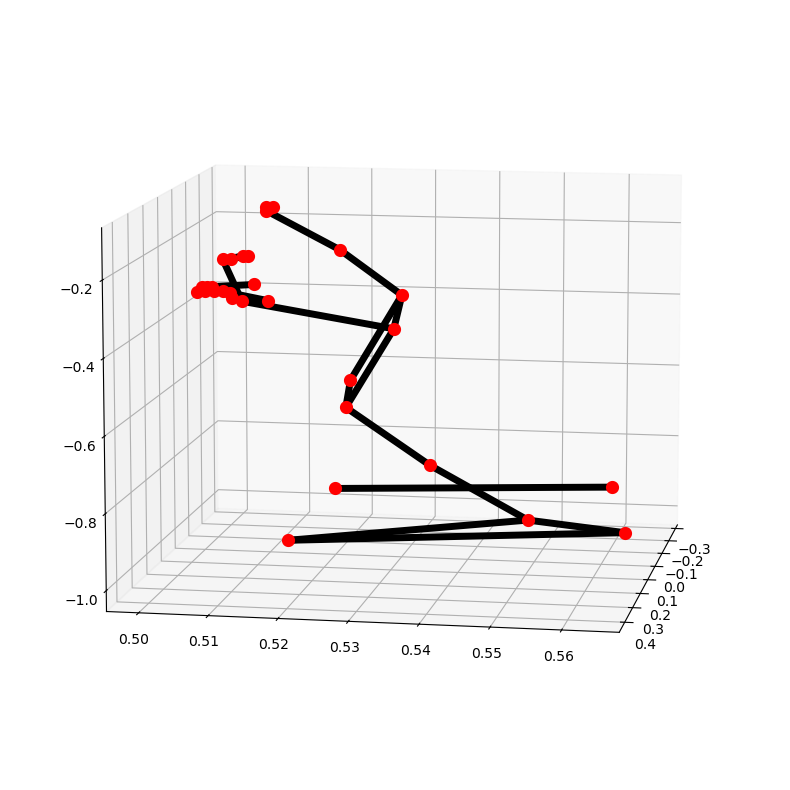

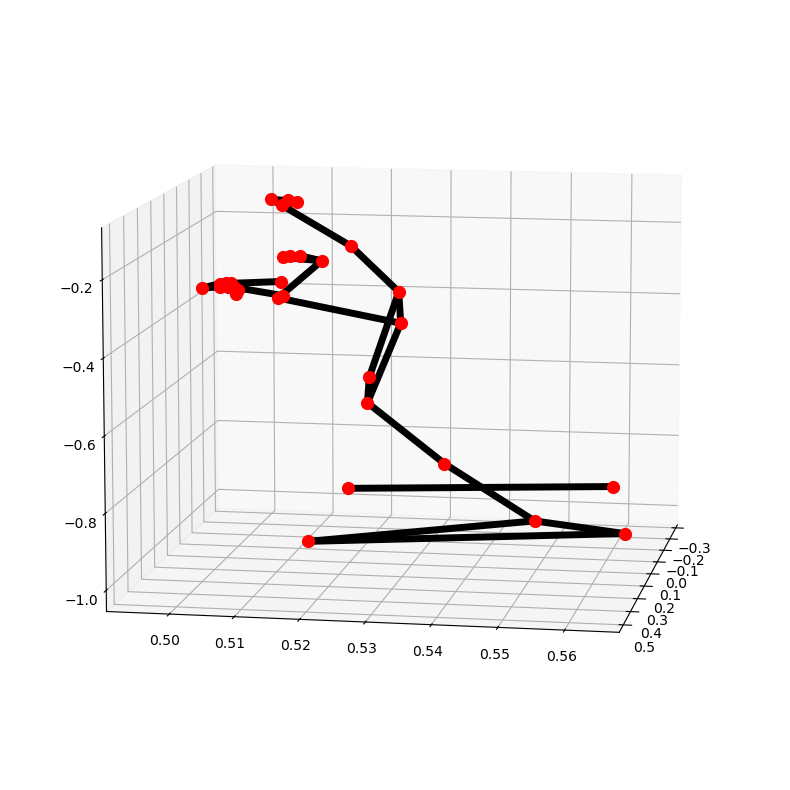

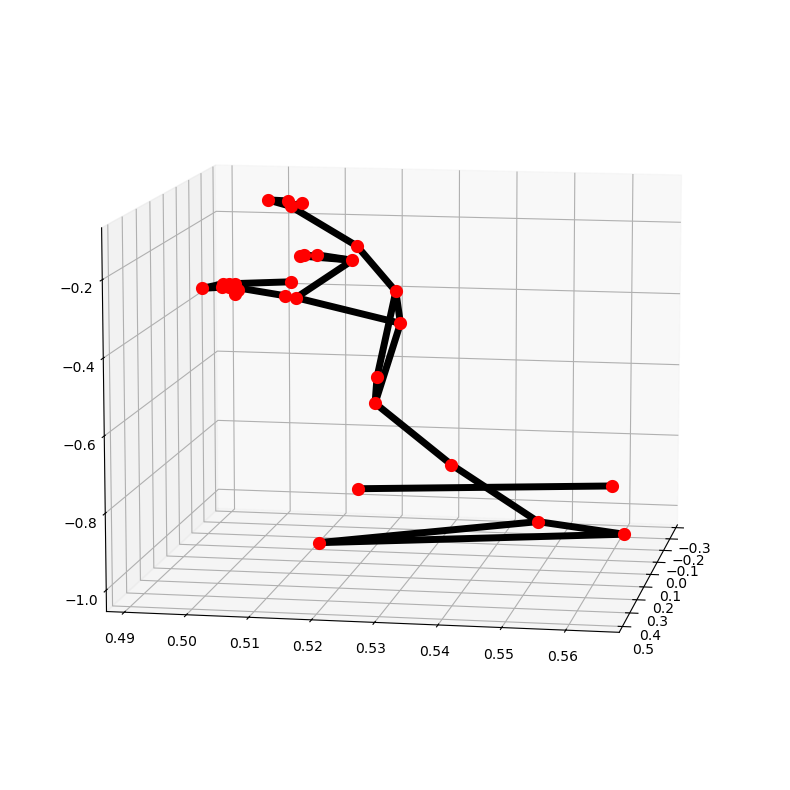

In [193]:
vid_path = "data/all videos/good1.mp4" # path to video
cap = cv2.VideoCapture(vid_path) #initiate video capture

#Initiate Holistic Model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    # streaming the video
    while cap.isOpened():
        ret, frame = cap.read()

        # recolor feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
    
        # Make detections
        results = pose.process(image)
    
        # Recolor image back to BGR for rendering
        image.flags.writeable = False
        image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

        if results.pose_landmarks:
            mp_drawing.plot_landmarks(results.pose_landmarks,  mp_pose.POSE_CONNECTIONS)
            new_landmark = rotate_landmark(results.pose_world_landmarks)
            # import matplotlib.pyplot as plt

            # fig = plt.figure()
            # ax = fig.add_subplot(111, projection="3d")
            # fig.subplots_adjust(left=0.0, right=1, bottom=0, top=1)

            # plot_world_landmarks(
            #     plt,
            #     ax,
            #     results.pose_world_landmarks,
            # )

        # # extract landmarks
        # k = cv2.waitKey(1)
        # if k == 106: # while j is pressed, landmark will be recorded as class 0 => normal
        #     export_landmark(results, 0)
        # if k == 107: # while k is pressed, landmark will be recorded as class 1 => narrow
        #     export_landmark(results, 1)
        # if k == 108: # while l is pressed, landmark will be recorded as class 2 => wide
        #     export_landmark(results, 2)
            
        # Stream vid result
        cv2.imshow("Raw Cam Feed", image)

        # press 'q' than the video will stop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [23]:
for i in results.pose_landmarks.landmark:
    print(i.y)

0.32624220848083496
0.3149641752243042
0.31530576944351196
0.31605595350265503
0.31464654207229614
0.31482306122779846
0.31521546840667725
0.3263700604438782
0.32179516553878784
0.3375573754310608
0.3387441635131836
0.38851696252822876
0.38033148646354675
0.30846086144447327
0.32445913553237915
0.23838646709918976
0.25078284740448
0.220038041472435
0.22577057778835297
0.21855977177619934
0.2171061635017395
0.22427472472190857
0.22578667104244232
0.6434534192085266
0.63739013671875
0.8052998185157776
0.802966833114624
0.9779695868492126
0.9703564047813416
0.9961903691291809
0.9889095425605774
0.9954208731651306
0.9917178153991699


In [70]:

coord = np.array([1, 2, 3])

print(np.dot(rotation_marix, coord))

[-0.70710678  2.12132034  3.        ]


In [71]:
print(-1/np.sqrt(2))

-0.7071067811865475


In [52]:
print(np.cos(30))

0.15425144988758405


In [61]:
45*(np.pi/180)

0.7853981633974483

0.7853981633974483

In [105]:
a = np.array(
[
 [1, 2],
 [2, 4],
 [1, 2],
 [2, 4],
])

a

array([[1, 2],
       [2, 4],
       [1, 2],
       [2, 4]])

In [120]:
np.reshape(a, (2,2,2))

array([[[1, 2],
        [2, 4]],

       [[1, 2],
        [2, 4]]])

In [121]:
a

array([[1, 2],
       [2, 4],
       [1, 2],
       [2, 4]])

In [174]:
new_landmark[:, 32:]

array([[[-0.08448986,  1.15124727, -0.14545804,  0.82921249]],

       [[-0.648794  ,  0.95476445, -0.14545804,  0.82921249]],

       [[-1.03925431,  0.50245327, -0.14545804,  0.82921249]],

       [[-1.15124727, -0.08448986, -0.14545804,  0.82921249]],

       [[-0.95476445, -0.648794  , -0.14545804,  0.82921249]],

       [[-0.50245327, -1.03925431, -0.14545804,  0.82921249]],

       [[ 0.08448986, -1.15124727, -0.14545804,  0.82921249]],

       [[ 0.648794  , -0.95476445, -0.14545804,  0.82921249]],

       [[ 1.03925431, -0.50245327, -0.14545804,  0.82921249]],

       [[ 1.15124727,  0.08448986, -0.14545804,  0.82921249]],

       [[ 0.95476445,  0.648794  , -0.14545804,  0.82921249]]])

In [134]:
new_landmark.shape

(11, 33, 4)

In [138]:
results.pose_landmarks.landmark

[x: 0.390560985
y: 0.31521225
z: 0.362309217
visibility: 0.999955058
, x: 0.374838948
y: 0.302957833
z: 0.279127628
visibility: 0.999960363
, x: 0.365858346
y: 0.3035568
z: 0.279281735
visibility: 0.999950409
, x: 0.356498271
y: 0.304483294
z: 0.279316813
visibility: 0.999955356
, x: 0.401742548
y: 0.301643163
z: 0.273055375
visibility: 0.99997741
, x: 0.410959482
y: 0.301424891
z: 0.273055822
visibility: 0.999973714
, x: 0.420517355
y: 0.301479131
z: 0.272820473
visibility: 0.999976695
, x: 0.345700741
y: 0.315801799
z: 0.0311125144
visibility: 0.99996233
, x: 0.441502452
y: 0.31026113
z: 0.00161925552
visibility: 0.999971867
, x: 0.379245549
y: 0.327817172
z: 0.297910362
visibility: 0.999864936
, x: 0.409431487
y: 0.327693343
z: 0.288489
visibility: 0.99986434
, x: 0.280362755
y: 0.39139244
z: 0.103672728
visibility: 0.999369621
, x: 0.537290394
y: 0.380009055
z: -0.202521354
visibility: 0.999827504
, x: 0.195764199
y: 0.336477816
z: 0.542096198
visibility: 0.878967345
, x: 0.7136639

In [139]:
for i in results.pose_landmarks.landmark:
    print(i)

x: 0.390560985
y: 0.31521225
z: 0.362309217
visibility: 0.999955058

x: 0.374838948
y: 0.302957833
z: 0.279127628
visibility: 0.999960363

x: 0.365858346
y: 0.3035568
z: 0.279281735
visibility: 0.999950409

x: 0.356498271
y: 0.304483294
z: 0.279316813
visibility: 0.999955356

x: 0.401742548
y: 0.301643163
z: 0.273055375
visibility: 0.99997741

x: 0.410959482
y: 0.301424891
z: 0.273055822
visibility: 0.999973714

x: 0.420517355
y: 0.301479131
z: 0.272820473
visibility: 0.999976695

x: 0.345700741
y: 0.315801799
z: 0.0311125144
visibility: 0.99996233

x: 0.441502452
y: 0.31026113
z: 0.00161925552
visibility: 0.999971867

x: 0.379245549
y: 0.327817172
z: 0.297910362
visibility: 0.999864936

x: 0.409431487
y: 0.327693343
z: 0.288489
visibility: 0.99986434

x: 0.280362755
y: 0.39139244
z: 0.103672728
visibility: 0.999369621

x: 0.537290394
y: 0.380009055
z: -0.202521354
visibility: 0.999827504

x: 0.195764199
y: 0.336477816
z: 0.542096198
visibility: 0.878967345

x: 0.713663936
y: 0.3408029

In [152]:
new_landmark.duplicated()

AttributeError: 'numpy.ndarray' object has no attribute 'duplicated'

30
30
30
30
30
30
30
30
30
30
60
60
60
60
60
60
60
60
60
60
90
90
90
90
90
90
90
90
90
90
120
120
120
120
120
120
120
120
120
120
150
150
150
150
150
150
150
150
150
150
180
180
180
180
180
180
180
180
180
180
210
210
210
210
210
210
210
210
210
210
240
240
240
240
240
240
240
240
240
240
270
270
270
270
270
270
270
270
270
270
300
300
300
300
300
300
300
300
300
300
330
330
330
330
330
330
330
330
330
330


In [175]:
new_landmark

array([[[ 0.18132035,  0.46921174,  0.36795375,  0.99995548],
        [ 0.17489076,  0.45128739,  0.28530228,  0.99996078],
        [ 0.16698951,  0.44729575,  0.28546154,  0.99995106],
        ...,
        [-0.09016705,  1.09812114, -0.10371414,  0.95661497],
        [-0.14348483,  1.0786372 ,  0.05924444,  0.64316815],
        [-0.08448986,  1.15124727, -0.14545804,  0.82921249]],

       [[-0.07757785,  0.49700946,  0.36795375,  0.99995548],
        [-0.07418386,  0.47827173,  0.28530228,  0.99996078],
        [-0.07903072,  0.47086424,  0.28546154,  0.99995106],
        ...,
        [-0.62714753,  0.90591728, -0.10371414,  0.95661497],
        [-0.6635801 ,  0.8623848 ,  0.05924444,  0.64316815],
        [-0.648794  ,  0.95476445, -0.14545804,  0.82921249]],

       [[-0.31568912,  0.3916339 ,  0.36795375,  0.99995548],
        [-0.30338097,  0.37710354,  0.28530228,  0.99996078],
        [-0.30387473,  0.36826503,  0.28546154,  0.99995106],
        ...,
        [-0.99608433,  0.47

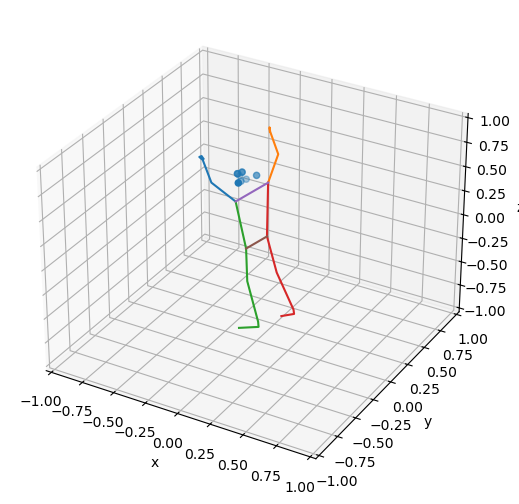

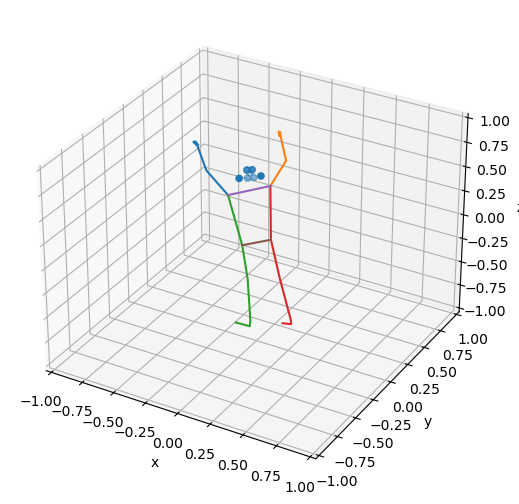

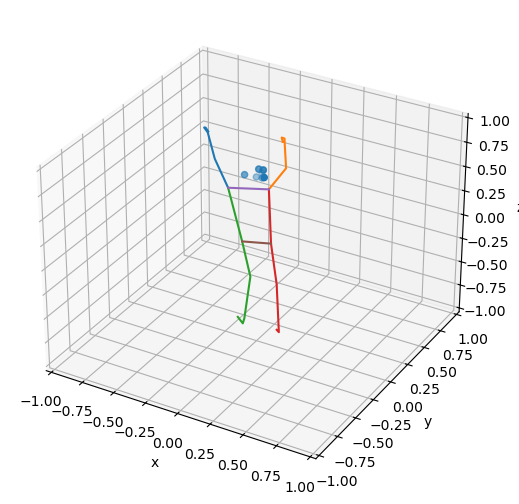

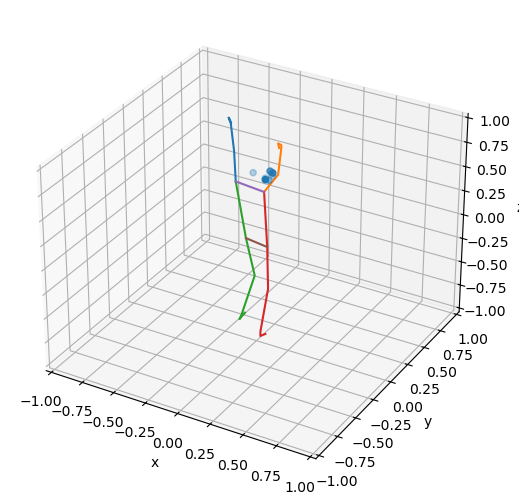

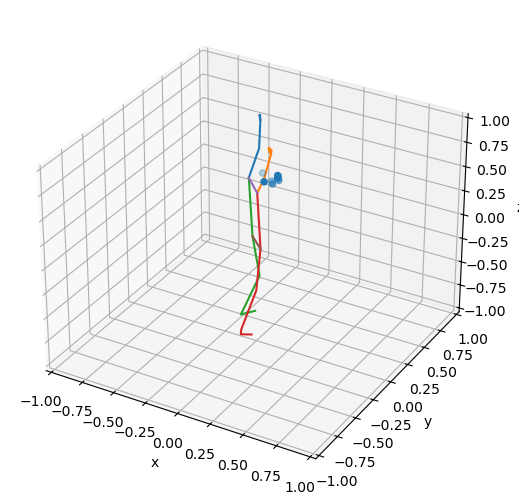

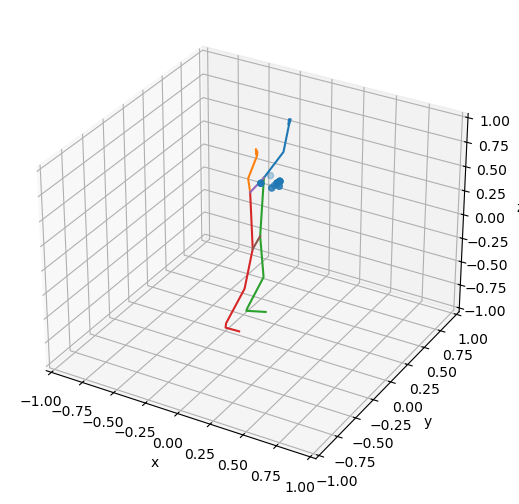

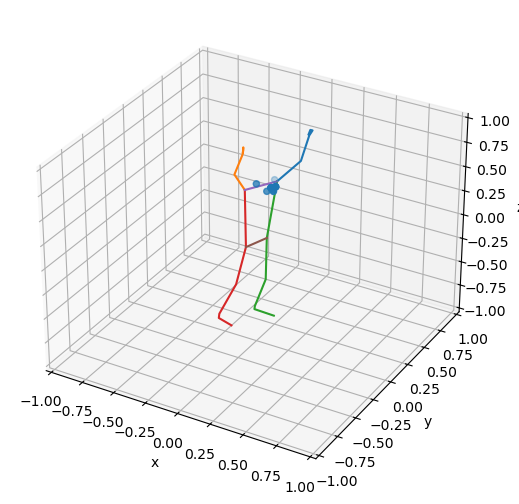

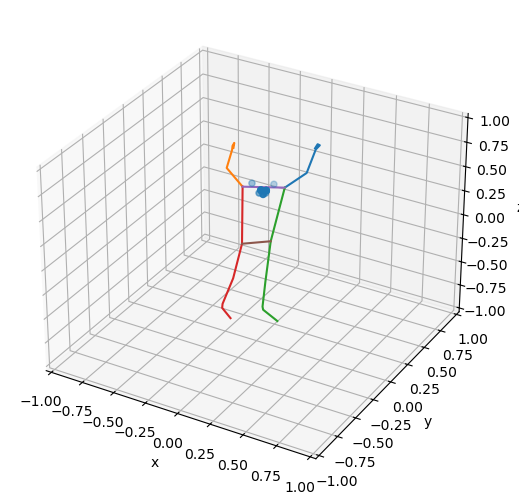

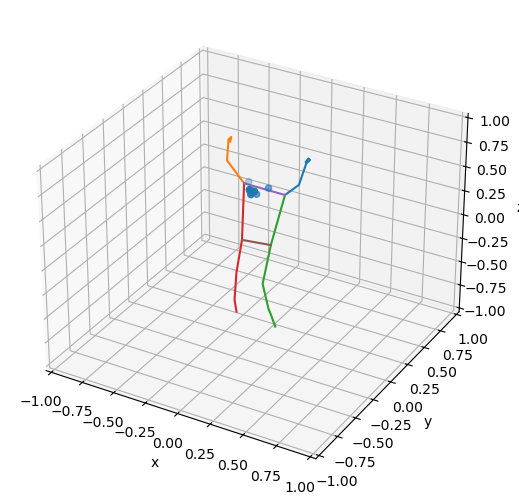

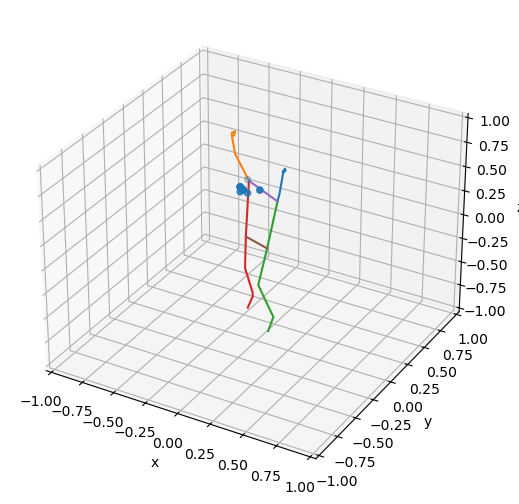

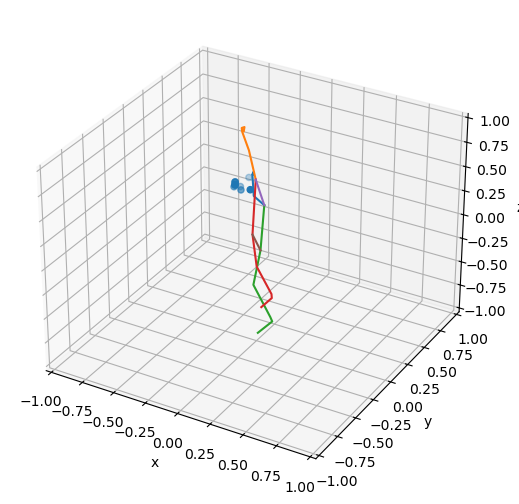

In [194]:
import matplotlib.pyplot as plt


for landmark in new_landmark:
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    fig.subplots_adjust(left=0.0, right=1, bottom=0, top=1)
    
    plot_world_landmarks(
        plt,
        ax,
        landmark,
    )